In [ ]:
## change in how age profile affects voting with generations!

In [ ]:
## try to replicate the John Burn Murdoch breakdown
# (which I'm sure I've already done elsewhere, but not labelled the notbook clearly!)

In [1]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'

Toggle code

2023-08-15 13:55:53,840 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 


In [3]:
f2f_harmonised.columns

Index(['dataset', 'uid', 'housing_det', 'housing', 'inc', 'vote', 'year', 'wt',
       'age', 'vote_simple', 'bloc', 'birth_year', 'harmonised_voted',
       'inc_det', 'vote_complete', 'vote_complete_simple', 'bloc_complete',
       'turnout_complete', 'gender', 'gender_complete', 'age_left_education',
       'age_left_education_2', 'age_left_education_3', 'anyQuals',
       'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
       'other_academic_vocational', 'other_tech_business',
       'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
       'trade_appenticeship', 'nursing', 'teachers_training',
       'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
       'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
       'rsa_other_commercial', 'school_cert_or_matric',
       'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
       'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
       'professional_qualification'

In [4]:
subjClass = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\subjClass.zip", compression='zip')

In [10]:
subjClass["subjClass"].value_counts(dropna=False)

NaN    30022
0.0    14656
1.0     8053
Name: subjClass, dtype: int64

In [15]:
subjClass["subjClass"][f2f_harmonised["dataset"]=="2019"].value_counts(dropna=False,normalize=True)

0.0    0.435884
NaN    0.299797
1.0    0.264318
Name: subjClass, dtype: float64

index
0        True
1        True
2        True
3        True
4        True
        ...  
2917    False
2918    False
2919    False
2920    False
2921    False
Name: dataset, Length: 52731, dtype: bool

In [6]:
# chart with age on X, voting behaviour on y, hue by generation

# we're trying to isolate diff by generation

# (hypothesis - it starts with Boomers skewing Conservative, then Gen-Z leans away)

In [8]:
search(f2f_harmonised,"Auth|generation|age|birth")

age                     52731
birth_year              52731
age_left_education      32253
age_left_education_2    52164
age_left_education_3    52164
AuthRight               52731
generation              52731
dtype: int64

In [9]:
f2f_harmonised[["age","generation","birth_year","AuthRight"]]

,age,generation,birth_year,AuthRight
index,,,,
0,34.0,1.70,1985.0,0.0
1,45.0,2.25,1974.0,0.0
2,33.0,1.65,1986.0,0.0
3,22.0,1.10,1997.0,0.0
4,35.0,1.75,1984.0,0.0
...,...,...,...,...
2917,14.0,0.70,1945.0,0.0
2918,19.0,0.95,1940.0,0.0
2919,13.0,0.65,1946.0,0.0


In [18]:
f2f_harmonised["birth_decade"] = (round(f2f_harmonised["birth_year"]/10)*10).astype(int)


f2f_harmonised["birth_decade"].value_counts().sort_index()

1860       2
1870      14
1880     346
1890    1053
1900    2624
1910    3773
1920    6103
1930    6354
1940    9115
1950    6954
1960    7253
1970    4461
1980    2938
1990    1318
2000     423
Name: birth_decade, dtype: int64

In [20]:
f2f_harmonised["birth_decade"] = f2f_harmonised["birth_decade"].replace(1860,1880).replace(1870,1880)

# 1880 effectively equals 1880-


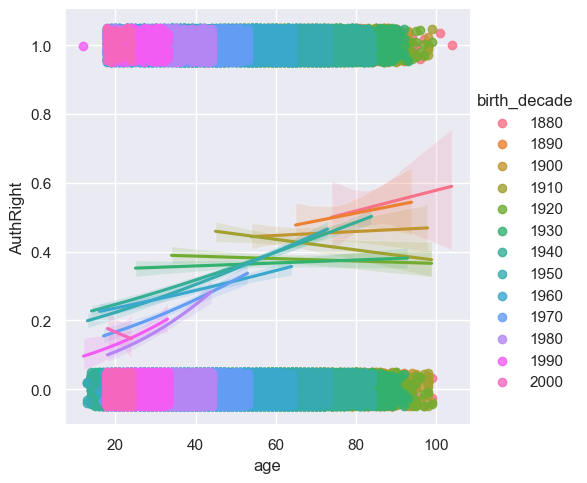

In [22]:
sns.lmplot(data=f2f_harmonised, x='age', y='AuthRight', hue='birth_decade', logistic=True, y_jitter=0.05)

In [28]:
auth_norms = f2f_harmonised.groupby('dataset')["AuthRight"].mean()

f2f_harmonised["AuthRight_norm"] = f2f_harmonised[["AuthRight","dataset"]].apply(lambda x: x["AuthRight"]-auth_norms.loc[x["dataset"]],axis=1)

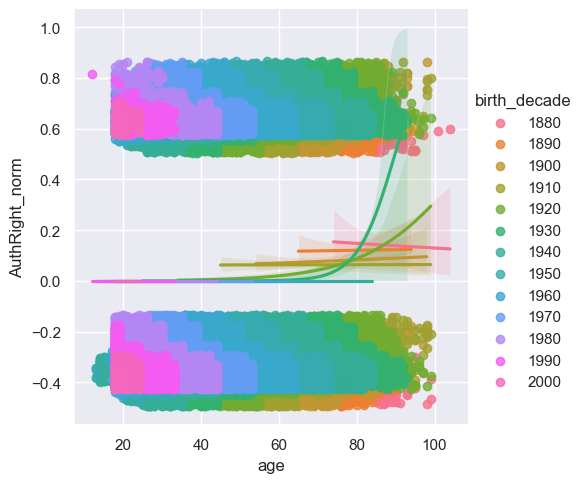

In [29]:
sns.lmplot(data=f2f_harmonised, x='age', y='AuthRight_norm', hue='birth_decade', logistic=True, y_jitter=0.05)

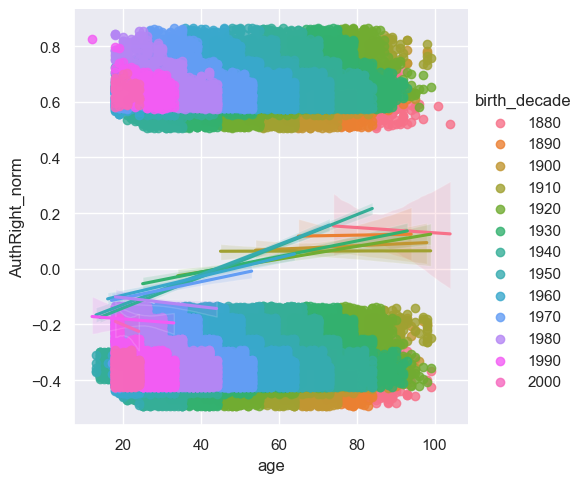

In [30]:
sns.lmplot(data=f2f_harmonised, x='age', y='AuthRight_norm', hue='birth_decade', y_jitter=0.05)